In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

import sys
sys.path.append(r"../../functions")
import calculations
import plotting

In [ ]:
import openpyxl

#Tunisia GDP
tn_gdp = pd.read_csv("GDP-TUN-Annual.csv")
tn_gdp.columns = ["date", "gdp_usd"]

tn_gdp["date"] = pd.to_datetime(tn_gdp["date"])
tn_gdp['gdp_usd'] = tn_gdp['gdp_usd'] / 1e9

#Tunisia Minimum Wage
tn_wage=pd.read_excel("MinWage-TN-Annual.xlsx")
tn_wage.columns = ["date", "wage_hourly_TND"]
tn_wage = tn_wage.sort_values(by="date").reset_index(drop=True)
tn_wage["date"] = pd.to_datetime(tn_gdp["date"])


In [3]:
conversion_rates=pd.read_csv("exchange-rate.csv")
new_rates = pd.read_csv("TND_to_USD_Exchange_Rates_2011_2024.csv")

conversion_rates.columns = ["date", "conversionRate"]
conversion_rates['date'] = pd.to_datetime(conversion_rates['date'])
conversion_rates = conversion_rates[conversion_rates['date'].dt.year >= 1990]


new_rates.columns = ["date", "conversionRate"]
new_rates['date'] = pd.to_datetime(new_rates['date'], format='%Y')

full_rates = pd.concat([conversion_rates, new_rates], ignore_index=True)


tn_wage_usd = pd.merge(tn_wage, full_rates, on='date', how='inner')
# Before 2011 → TND per USD → divide
tn_wage_usd.loc[tn_wage_usd['date'] < '2011-01-01', 'Wage_USD'] = (
    tn_wage_usd['wage_hourly_TND'] / tn_wage_usd['conversionRate']
)

# 2011 and after → USD per TND → multiply
tn_wage_usd.loc[tn_wage_usd['date'] >= '2011-01-01', 'Wage_USD'] = (
    tn_wage_usd['wage_hourly_TND'] * tn_wage_usd['conversionRate']
)




In [4]:
print("TUNISIA Wage Data:")
display(tn_wage_usd)

print("TUNISIA GDP Data:")
display(tn_gdp)

print("exchange rates")
display(conversion_rates.head())

print("exchange rates")
display(new_rates.head())

display(full_rates.head())

TUNISIA Wage Data:


,date,wage_hourly_TND,conversionRate,Wage_USD
0,1990-01-01,0.6,0.878333,0.683112
1,1991-01-01,0.6,0.924621,0.648915
2,1992-01-01,0.7,0.884433,0.791467
3,1993-01-01,0.7,1.003742,0.697391
4,1994-01-01,0.7,1.011554,0.692004
5,1995-01-01,0.8,0.945750,0.845890
6,1996-01-01,0.8,0.973408,0.821854
7,1997-01-01,0.8,1.105908,0.723387
8,1998-01-01,0.9,1.138725,0.790358
9,1999-01-01,0.9,1.186225,0.758709


TUNISIA GDP Data:


,date,gdp_usd
0,1990-01-01,12.290568
1,1991-01-01,13.074783
2,1992-01-01,15.496708
3,1993-01-01,14.608336
4,1994-01-01,15.633174
5,1995-01-01,18.030877
6,1996-01-01,19.587162
7,1997-01-01,20.746210
8,1998-01-01,21.802894
9,1999-01-01,22.943202


exchange rates


,date,conversionRate
40,1990-01-01,0.878333
41,1991-01-01,0.924621
42,1992-01-01,0.884433
43,1993-01-01,1.003742
44,1994-01-01,1.011554


exchange rates


,date,conversionRate
0,2011-01-01,0.7109
1,2012-01-01,0.6337
2,2013-01-01,0.6073
3,2014-01-01,0.5742
4,2015-01-01,0.5211


,date,conversionRate
0,1990-01-01,0.878333
1,1991-01-01,0.924621
2,1992-01-01,0.884433
3,1993-01-01,1.003742
4,1994-01-01,1.011554


In [ ]:


Mean_TNGDP = calculations.arithmeticMean(tn_gdp.gdp_usd)
variance_TNGDP = calculations.variance(tn_gdp.gdp_usd)
standarddeviation_TNGDP = calculations.standardDeviation(tn_gdp.gdp_usd)
quartiles_TNGDP = calculations.quartiles(tn_gdp.gdp_usd)


print(len(tn_gdp.gdp_usd))
print(f"Mean = {round(Mean_TNGDP, 2)}")
print(f"Variance = {round(variance_TNGDP,2)}")
print(f"Standard Deviation = {round(standarddeviation_TNGDP, 2)}")
print(f"Quartiles = {quartiles_TNGDP}")



34
Mean = 33.33
Variance = 164.06
Standard Deviation = 12.81
Quartiles = {'Q1': 21.47, 'Q2': 36.65, 'Q3': 44.86}


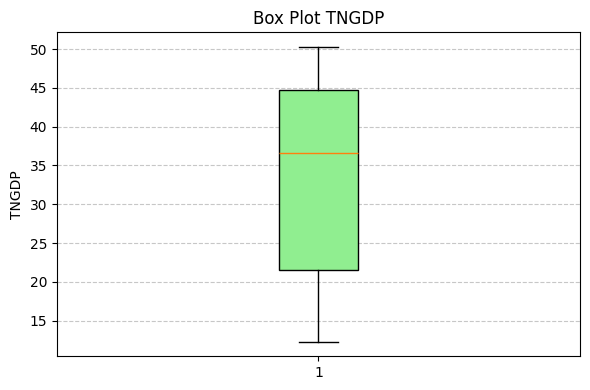

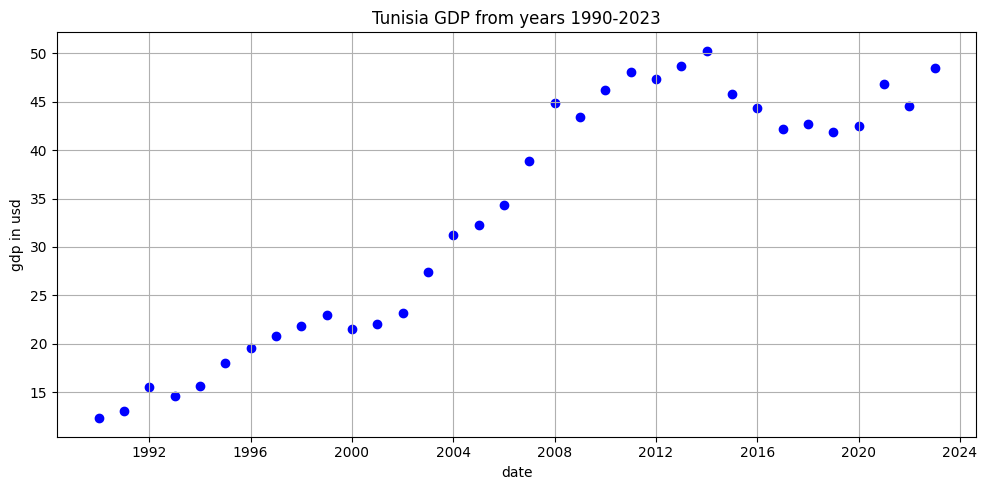

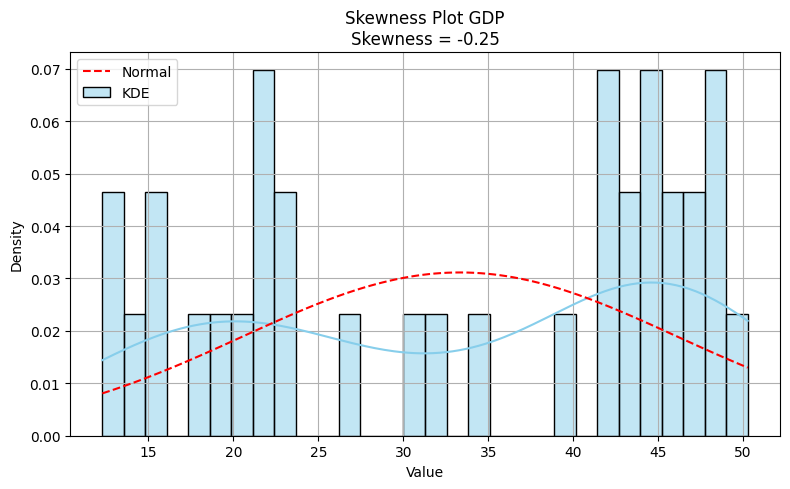

In [21]:
lot_boxplot_TNGDP = plotting.plot_boxplot(tn_gdp.gdp_usd, title="Box Plot TNGDP", ylabel="TNGDP", showfliers=True, color="lightgreen")
linearPlot= plotting.plot_series(tn_gdp.date, tn_gdp.gdp_usd, "Tunisia GDP from years 1990-2023", "date", "gdp in usd", color="blue", label=None, grid=True)
plot_skewness_TNGDP = plotting.plot_skewness(tn_gdp.gdp_usd, title="Skewness Plot GDP", color="skyblue", bins=30)

In [ ]:
Mean_TNWAge = calculations.arithmeticMean(tn_wage_usd.Wage_USD)
variance_TNWAge = calculations.variance(tn_wage_usd.Wage_USD)
standarddeviation_TNWAge = calculations.standardDeviation(tn_wage_usd.Wage_USD)
quartiles_TNWAge = calculations.quartiles(tn_wage_usd.Wage_USD)


print(len(tn_wage_usd))
print(f"Mean = {round(Mean_TNWAge, 2)}")
print(f"Variance = {round(variance_TNWAge,2)}")
print(f"Standard Deviation = {round(standarddeviation_TNWAge, 2)}")
print(f"Quartiles = {quartiles_TNWAge}")


34
Mean = 0.79
Variance = 0.01
Standard Deviation = 0.1
Quartiles = {'Q1': 0.7, 'Q2': 0.78, 'Q3': 0.86}


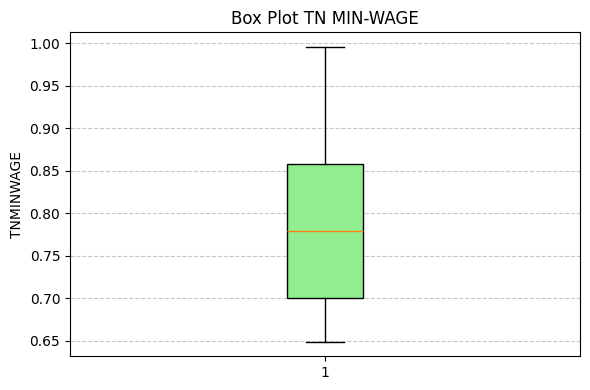

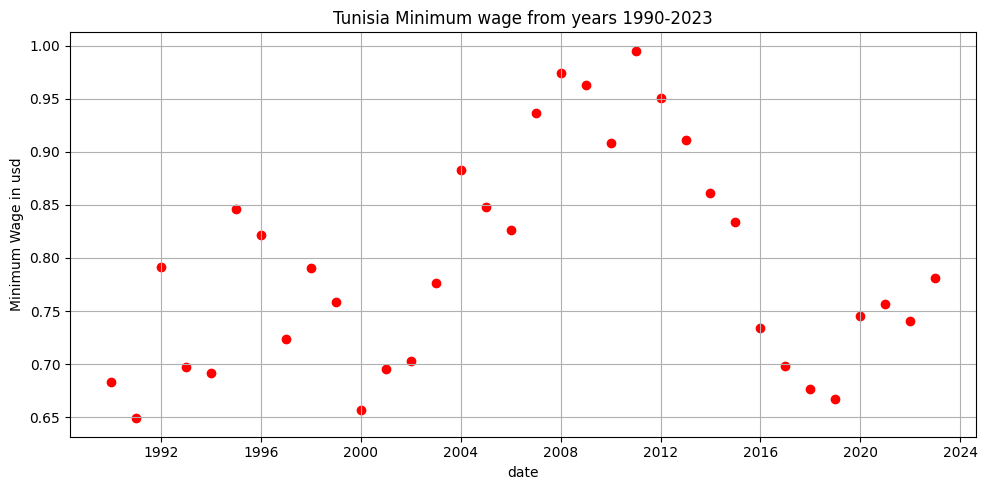

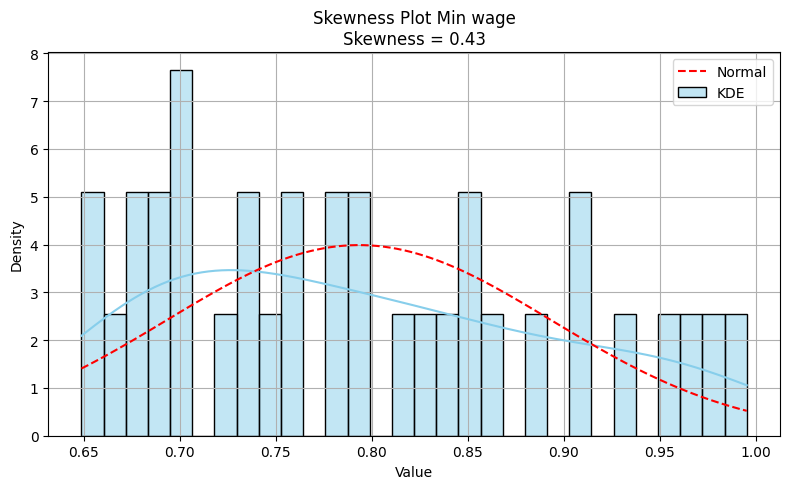

In [22]:
lot_boxplot_TNMIN = plotting.plot_boxplot(tn_wage_usd.Wage_USD, title="Box Plot TN MIN-WAGE", ylabel="TNMINWAGE", showfliers=True, color="lightgreen")
linearPlot2= plotting.plot_series(tn_wage_usd.date,tn_wage_usd.Wage_USD, "Tunisia Minimum wage from years 1990-2023", "date", "Minimum Wage in usd", color="red", label=None, grid=True)
plot_skewness_TNMIN = plotting.plot_skewness(tn_wage_usd.Wage_USD, title="Skewness Plot Min wage", color="skyblue", bins=30)

In [9]:
covariance_TN = calculations.covariance(tn_gdp.gdp_usd, tn_wage_usd.Wage_USD)
correlation_TN = calculations.correlation(tn_gdp.gdp_usd, tn_wage_usd.Wage_USD)
print(f"Covariance between GDP and Minimum wage = {round(covariance_TN, 2)}")
print(f"Correlation between GDP and Minimum wage = {round(correlation_TN,2)}")


Covariance between GDP and Minimum wage = 0.64
Correlation between GDP and Minimum wage = 0.5


In [10]:
regression_slope_TN = calculations.regression_slope(tn_gdp.gdp_usd, tn_wage_usd.Wage_USD)
regression_intercept_TN = calculations.regression_intercept(tn_gdp.gdp_usd, tn_wage_usd.Wage_USD)
regression_line_TN = calculations.regression_line(tn_gdp.gdp_usd, tn_wage_usd.Wage_USD)

print(regression_intercept_TN)
print(regression_slope_TN)
print(regression_line_TN)

0.7895452859665757
0.00011504141278843227
y = 0.0001 * x + 0.7895


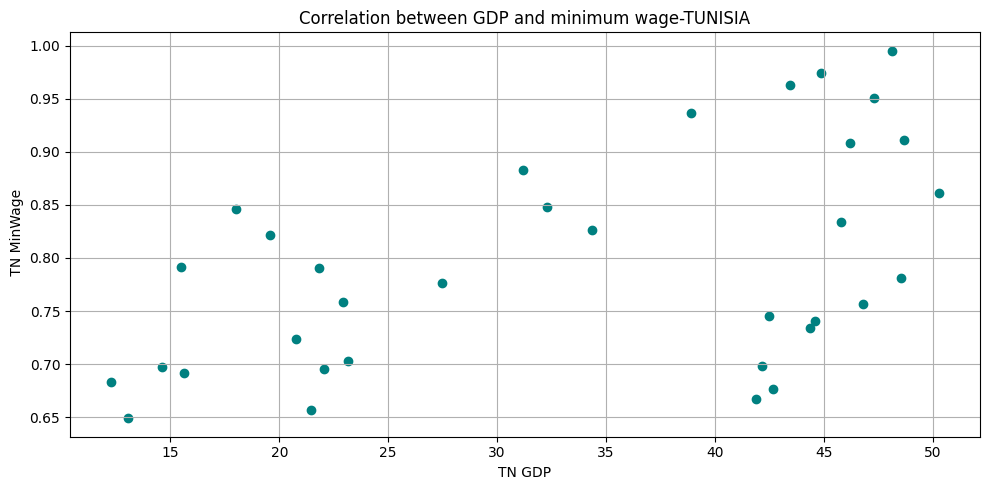

In [12]:
plot_series_US = plotting.plot_series(tn_gdp.gdp_usd, tn_wage_usd.Wage_USD, 'Correlation between GDP and minimum wage-TUNISIA', 'TN GDP',' TN MinWage', color="teal", label=None, grid=True)

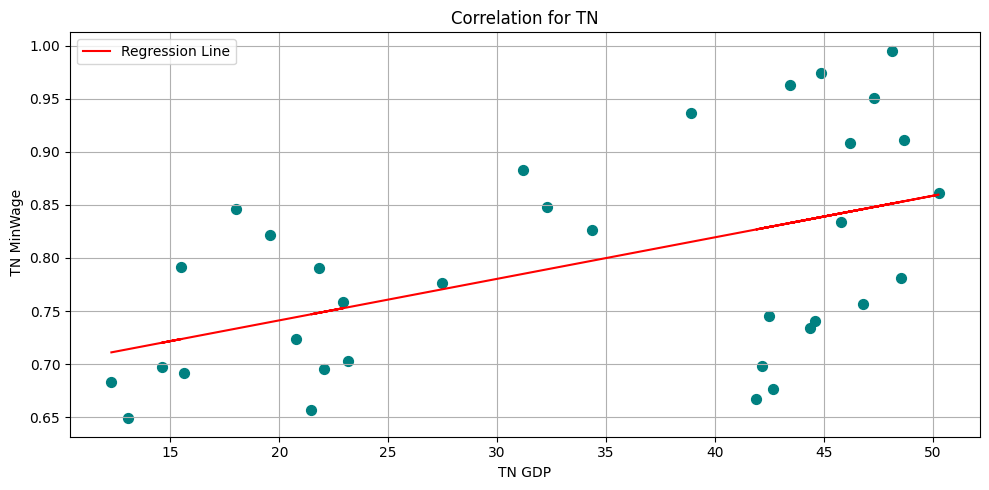

In [23]:
plot_scatter_US = plotting.plot_scatter(
    tn_gdp.gdp_usd, tn_wage_usd.Wage_USD,
    'Correlation for TN', 'TN GDP',' TN MinWage',
    color="teal", label=None,
    grid=True, size=50,
    show_regression=True, reg_color="red", reg_label="Regression Line"
)

In [37]:
totalVarianceTN=calculations.total_variation(tn_wage_usd.Wage_USD)
explainedVarianceTN=calculations.explained_variation(tn_gdp.gdp_usd,tn_wage_usd.Wage_USD)
unexplainedVarianceTN=calculations.unexplained_variation(tn_gdp.gdp_usd,tn_wage_usd.Wage_USD)
mean_squared_errorTN=calculations.mean_squared_error(tn_gdp.gdp_usd,tn_wage_usd.Wage_USD)
r_squaredTN=calculations.r_squared(tn_gdp.gdp_usd,tn_wage_usd.Wage_USD)

print("total variance:",round(totalVarianceTN,4))
print("explained variance:",round(explainedVarianceTN,4))
print("unexplained variance:",round(unexplainedVarianceTN,4))
print("mean squared error",round(mean_squared_errorTN,3))
print("R squared",round(r_squaredTN,4))



total variance: 0.3403
explained variance: 0.0001
unexplained variance: 0.3353
mean squared error 0.01
R squared 0.0145
